In [1]:
# Machine Learning ¬ Spam Email Detection using Decision Tree Classifier

In [2]:
# Importing the Necessary Libraries and Modules
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
import seaborn as sns

In [3]:
# Loading the data
dataset_link = 'https://media.geeksforgeeks.org/wp-content/uploads/20240620175612/spam_email.csv'
data = pd.read_csv(dataset_link)
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
# As a next step, let's prepare the data for decision tree classifier. The code is as follows:
def clean_str(string):
    reg = RegexpTokenizer(r'[a-z]+')
    string = string.lower()
    tokens = reg.tokenize(string)
    return " ".join(tokens)

In [5]:
data['Category'] = data['Category'].map({'ham': 0, 'spam':1})
data['clean_message'] = data['Message'].apply(
    lambda string: clean_str(string)
)

In [6]:
data.head()

,Category,Message,clean_message
0,0,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in a wkly comp to win fa cup final ...
3,0,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah i don t think he goes to usf he lives arou...


In [7]:
# Feature selection
cv = CountVectorizer()
X = cv.fit_transform(data.clean_message)
y = data['Category']

In [8]:
# Splitting the data into train and test parts
xtrain, xtest, ytrain, ytest = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [9]:
xtrain.shape, ytrain.shape

((4457, 7759), (4457,))

In [10]:
# Using the Decision Tree Classification Machine Learning Technique
dtree = DecisionTreeClassifier()
dtree.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [11]:
# Checking the accuracy of the Model
y_pred = dtree.predict(xtest)
accuracy = accuracy_score(ytest, y_pred)

In [12]:
print(f"The Accuracy of the Model is: {(accuracy*100):.2f} %")

The Accuracy of the Model is: 96.86 %


In [13]:
# Confusion Matrix for visualizing the error margin clearly and more precisely
cm = confusion_matrix(ytest, y_pred)

<Axes: >

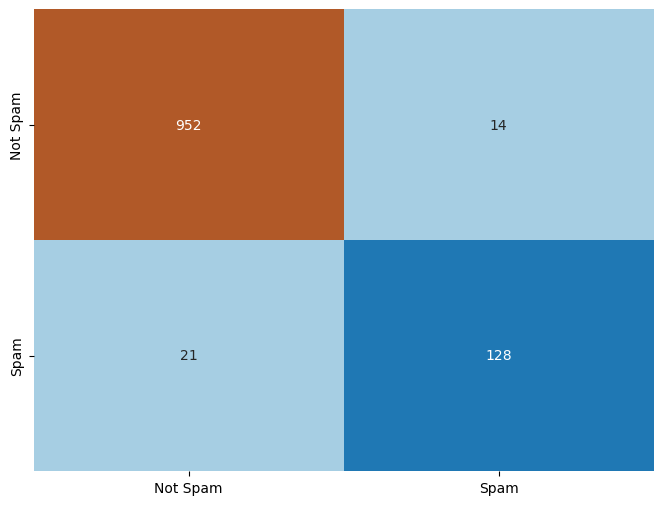

In [14]:
# Visualizng the Confusion Matrix using Seaborn Library
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot = True, cmap = 'Paired', cbar = False, fmt = 'd', xticklabels=[
            'Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])

In [15]:
# By Shariph Thapa Magar